**CREATED AND ANALYZED BY IBRAHIM ABU SAIID**


---




###**TOPIC - Analyzing Job Market Trends and Industry growth in the United States.**









---


**DATA SCIENCE QUESTIONS:**

1. How does the distribution of industry sector growth rates vary across the United States between 2015 and 2019?
2. Is there a relationship between skill migration and the rapid growth of the Mining and quarrying industry from 2016 to 2017?
3. What are the growth rates of industries within the highest-growing industry sector in the United States between 2015 and 2019?
4. What are the skill ranks for the highest-growing industry(venture capital and private equity) within the financial and insurance activities industry sector in the United States between 2015 and 2019?
5. What are the skill trends for the highest-growing industry(venture capital and private equity) within the financial and insurance activities section in the United States between 2015 and 2019?
6. How has skill migration influenced the penetration rates of skill groups from venture capital & private equity industry between 2015 and 2019?
7. What were the top industry migration gain and loss across various industries in the United States from 2015 to 2019?
8. How does this industry migration effect the industry growth of the computer software industry in US?

---



In [1]:
# Data gathering: Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Data access: Mounting Google Drive for access
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Data loading: Loading all the dataset required
industry_map = pd.read_csv('drive/MyDrive/linkedin_to_isic_rev_4_industry_mapping_0.csv')
skill_needs = pd.read_excel('drive/MyDrive/public_use-industry-skills-needs.xlsx', sheet_name = 'Industry Skills Needs')
skill_penetration = pd.read_excel('drive/MyDrive/public_use-skill-penetration.xlsx', sheet_name = 'Skill Penetration')
country_migration = pd.read_excel('drive/MyDrive/public_use-talent-migration.xlsx', sheet_name = 'Country Migration')
industry_migration = pd.read_excel('drive/MyDrive/public_use-talent-migration.xlsx', sheet_name = 'Industry Migration')
skill_migration = pd.read_excel('drive/MyDrive/public_use-talent-migration.xlsx', sheet_name = 'Skill Migration')
employment_growth_rate = pd.read_excel('drive/MyDrive/public_use-industry-employment-growth.xlsx', sheet_name = 'Growth from Industry Transition')

**1. How does the distribution of industry sector growth rates vary across the United States between 2015 and 2019?**

In [4]:
# Displaying summary information about the employment_growth_rate DataFrame
employment_growth_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7335 entries, 0 to 7334
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country_code        7335 non-null   object 
 1   country_name        7335 non-null   object 
 2   wb_region           7335 non-null   object 
 3   wb_income           7335 non-null   object 
 4   isic_section_index  7335 non-null   object 
 5   isic_section_name   7335 non-null   object 
 6   industry_id         7335 non-null   int64  
 7   industry_name       7335 non-null   object 
 8   growth_rate_2015    7335 non-null   float64
 9   growth_rate_2016    7335 non-null   float64
 10  growth_rate_2017    7335 non-null   float64
 11  growth_rate_2018    7335 non-null   float64
 12  growth_rate_2019    7335 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 745.1+ KB


In [5]:
# Displaying the first few rows of the employment_growth_rate DataFrame
employment_growth_rate.head()

,country_code,country_name,wb_region,wb_income,isic_section_index,isic_section_name,industry_id,industry_name,growth_rate_2015,growth_rate_2016,growth_rate_2017,growth_rate_2018,growth_rate_2019
0,ae,United Arab Emirates,Middle East & North Africa,High income,B,Mining and quarrying,56,Mining & Metals,0.078000,0.058550,0.043402,0.010048,-0.000621
1,ae,United Arab Emirates,Middle East & North Africa,High income,B,Mining and quarrying,57,Oil & Energy,0.033015,0.013479,0.017459,0.018514,0.022606
2,ae,United Arab Emirates,Middle East & North Africa,High income,C,Manufacturing,15,Pharmaceuticals,0.171367,0.136986,0.090631,0.048148,0.028423
3,ae,United Arab Emirates,Middle East & North Africa,High income,C,Manufacturing,23,Food Production,0.063351,0.038647,0.022137,0.005990,0.004317
4,ae,United Arab Emirates,Middle East & North Africa,High income,C,Manufacturing,52,Aviation & Aerospace,0.096607,0.056744,0.028673,0.015048,0.000816


In [6]:
# Filtering rows with country code 'us'
us_employment_growth_rate = employment_growth_rate[(employment_growth_rate['country_code'] == 'us')]

# Dropping unnecessary columns
us_employment_growth_rate = us_employment_growth_rate.drop(columns = ['country_name', 'wb_region', 'wb_income', 'isic_section_index', 'industry_id'])

# Renaming columns
us_employment_growth_rate = us_employment_growth_rate.rename(columns={'growth_rate_2015': '2015', 'growth_rate_2016': '2016', 'growth_rate_2017': '2017', 'growth_rate_2018': '2018',
                                                   'growth_rate_2019': '2019'})

In [7]:
# Displaying summary information about the us_employment_growth_rate DataFrame
us_employment_growth_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 6886 to 6962
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country_code       77 non-null     object 
 1   isic_section_name  77 non-null     object 
 2   industry_name      77 non-null     object 
 3   2015               77 non-null     float64
 4   2016               77 non-null     float64
 5   2017               77 non-null     float64
 6   2018               77 non-null     float64
 7   2019               77 non-null     float64
dtypes: float64(5), object(3)
memory usage: 5.4+ KB


In [8]:
# Displaying the first few rows of the us_employment_growth_rate DataFrame
us_employment_growth_rate.head()

,country_code,isic_section_name,industry_name,2015,2016,2017,2018,2019
6886,us,Mining and quarrying,Mining & Metals,-0.015838,-0.025637,0.005463,0.004842,-0.001883
6887,us,Mining and quarrying,Oil & Energy,-0.016801,-0.020809,0.005749,0.007972,0.002914
6888,us,Manufacturing,Pharmaceuticals,0.015979,0.015540,0.007148,0.004102,0.011908
6889,us,Manufacturing,Food Production,0.004666,0.007200,0.003567,-0.000632,-0.000076
6890,us,Manufacturing,Aviation & Aerospace,0.010161,0.010762,0.008679,0.019979,0.009865


In [9]:
# Grouping by 'isic_section_name' and calculating the average of growth rates
average_sector_growth_rates = us_employment_growth_rate.groupby('isic_section_name').mean(numeric_only=True).reset_index()

# Displaying the resulting DataFrame
average_sector_growth_rates.head(6)

,isic_section_name,2015,2016,2017,2018,2019
0,"Arts, entertainment and recreation",-0.002005,-0.000617,-0.000355,0.002224,0.001490
1,Financial and insurance activities,0.020726,0.017693,0.013332,0.012363,0.013227
2,Information and communication,0.017190,0.011389,0.007630,0.000701,0.003683
3,Manufacturing,0.009662,0.004169,0.004092,0.006230,0.001725
4,Mining and quarrying,-0.016319,-0.023223,0.005606,0.006407,0.000515
5,Professional scientific and technical activities,0.009702,0.007731,0.006890,0.004417,0.003036


In [10]:
# Displaying the info of resulting DataFrame
average_sector_growth_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   isic_section_name  6 non-null      object 
 1   2015               6 non-null      float64
 2   2016               6 non-null      float64
 3   2017               6 non-null      float64
 4   2018               6 non-null      float64
 5   2019               6 non-null      float64
dtypes: float64(5), object(1)
memory usage: 416.0+ bytes


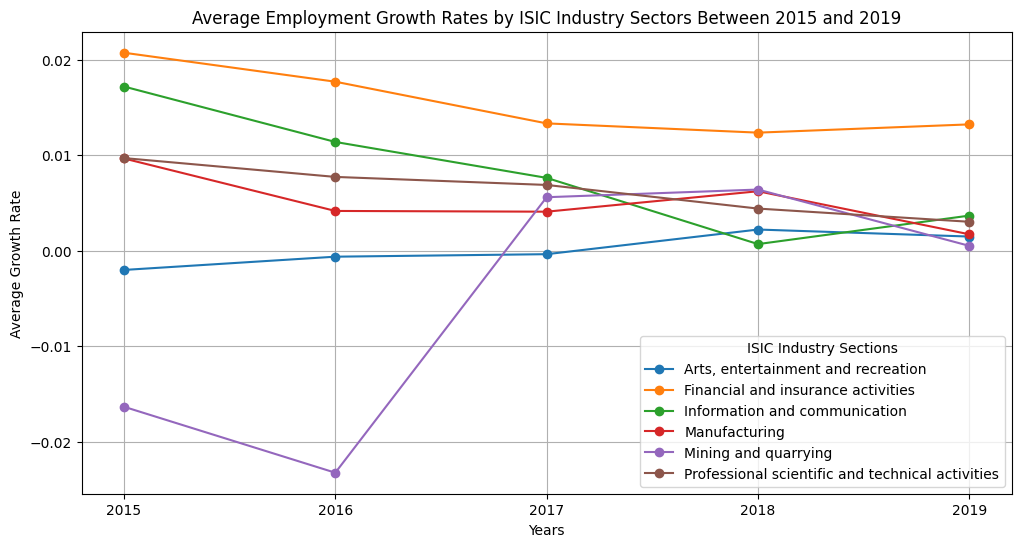

In [11]:
# Defining years and corresponding columns
years = ['2015', '2016', '2017', '2018', '2019']

# Plotting the line graph
plt.figure(figsize=(12, 6))
for index, row in average_sector_growth_rates.iterrows():
    plt.plot(years, [row[col] for col in years], marker='o', label=row['isic_section_name'])

# Setting labels, title legend
plt.xlabel('Years')
plt.ylabel('Average Growth Rate')
plt.title('Average Employment Growth Rates by ISIC Industry Sectors Between 2015 and 2019')
plt.legend(title='ISIC Industry Sections')
plt.grid(True)
plt.show()


**2. Is there a relationship between skill migration and the rapid growth of the Mining and quarrying industry sector from 2016 to 2017?**

In [12]:
# Filtering rows with isic_section_name as 'Mining and quarrying'
mining_skill_groups = skill_needs[skill_needs['isic_section_name'] == 'Mining and quarrying']

# Extracting unique skill_group_name values
unique_skill_groups_mining = mining_skill_groups['skill_group_name'].unique()

# Printing the unique vaules
print(unique_skill_groups_mining)


['Mining' 'Negotiation' 'Project Management' 'Business Management'
 'Earth Science' 'Manufacturing Operations' 'Drilling Engineering'
 'Digital Literacy' 'Maintenance & Repair' 'Procurement' 'Oil & Gas'
 'Utilities' 'Teamwork' 'Construction Engineering' 'Leadership'
 'Instrumentation']


In [13]:
# Filteing rows with country_code as 'us'
us_skill_migration = skill_migration[skill_migration['country_code'] == 'us']

# Filtering rows with unique skill_group_names from 'Mining and quarrying'
mining_skill_group_migration = us_skill_migration[us_skill_migration['skill_group_name'].isin(unique_skill_groups_mining)]

# Extracting columns for net_per_10K from the filtered DataFrame
net_per_10K_columns = ['net_per_10K_2015', 'net_per_10K_2016', 'net_per_10K_2017', 'net_per_10K_2018', 'net_per_10K_2019']
mining_skill_group_migration = mining_skill_group_migration[['skill_group_name'] + net_per_10K_columns]

# Displaying the info of resulting mining_skill_group_migration DataFrame
mining_skill_group_migration.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 16775 to 16931
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   skill_group_name  16 non-null     object 
 1   net_per_10K_2015  16 non-null     float64
 2   net_per_10K_2016  16 non-null     float64
 3   net_per_10K_2017  16 non-null     float64
 4   net_per_10K_2018  16 non-null     float64
 5   net_per_10K_2019  16 non-null     float64
dtypes: float64(5), object(1)
memory usage: 896.0+ bytes


In [14]:
# Displaying the resulting mining_skill_group_migration DataFrame
mining_skill_group_migration.head()

,skill_group_name,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
16775,Digital Literacy,-31.67,-4.08,5.19,-0.22,3.73
16785,Leadership,-18.72,-0.31,7.31,1.61,4.35
16794,Maintenance & Repair,6.79,10.35,10.64,3.93,4.86
16807,Earth Science,15.91,16.06,15.58,5.35,6.32
16861,Manufacturing Operations,15.92,21.56,19.11,11.72,12.13


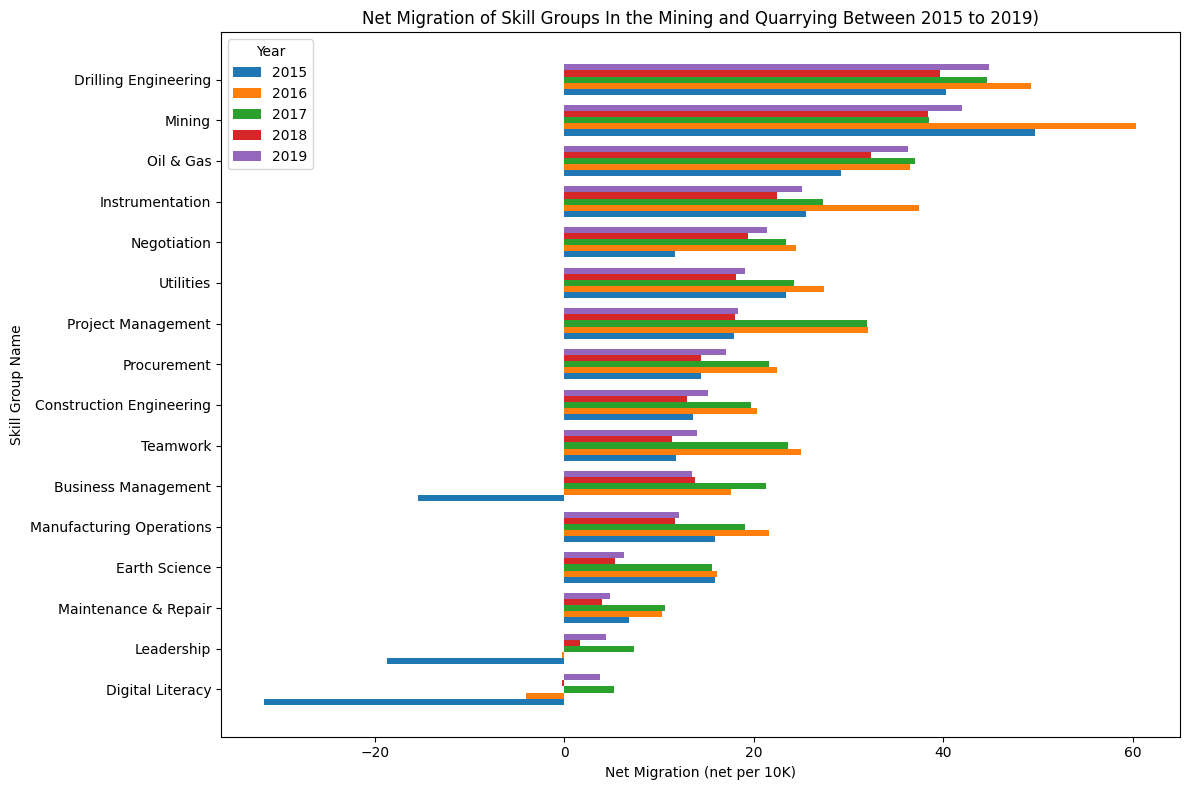

In [15]:
# Extracting necessary columns
years = ['2015', '2016', '2017', '2018', '2019']

# Plotting the bar plot
plt.figure(figsize=(12, 8))

bar_width = 0.15
bar_positions = np.arange(len(mining_skill_group_migration))

for i, year in enumerate(years):
    # Calculating position for bars
    bar_position = bar_positions + i * bar_width

    # Ploting bars for each year
    plt.barh(bar_position, mining_skill_group_migration['net_per_10K_' + year], height=bar_width, label=year)

# Setting labels and title
plt.xlabel('Net Migration (net per 10K)')
plt.ylabel('Skill Group Name')
plt.title('Net Migration of Skill Groups In the Mining and Quarrying Between 2015 to 2019)')
plt.yticks(bar_positions + (len(years) - 1) * bar_width / 2, mining_skill_group_migration['skill_group_name'])
plt.legend(title='Year')
plt.tight_layout()
plt.show()


**3. What are the growth rates of industries within the highest-growing industry section in the United States between 2015 and 2019?**

In [16]:
# Filtering rows with isic_section_name as 'Financial and insurance activities'
financial_industry_rates = us_employment_growth_rate[us_employment_growth_rate['isic_section_name'] == 'Financial and insurance activities']

# Displaying the info of resulting financial_industry_rates DataFrame
financial_industry_rates.head(7)

,country_code,isic_section_name,industry_name,2015,2016,2017,2018,2019
6922,us,Financial and insurance activities,Banking,-0.003461,-0.002487,0.003780,0.000677,0.002204
6923,us,Financial and insurance activities,Insurance,0.014137,0.008242,0.009099,0.006673,0.007420
6924,us,Financial and insurance activities,Financial Services,0.020449,0.010382,0.009822,0.007618,0.004166
6925,us,Financial and insurance activities,Investment Banking,0.009718,0.001931,0.003123,0.000740,0.000328
6926,us,Financial and insurance activities,Investment Management,0.037862,0.022598,0.020800,0.018575,0.009076
6927,us,Financial and insurance activities,Venture Capital & Private Equity,0.052473,0.066694,0.050734,0.043802,0.058499
6928,us,Financial and insurance activities,Capital Markets,0.013904,0.016494,-0.004035,0.008456,0.010900


In [17]:
# Extracting unique industry names from the 'industry_name' column
financial_industry_rates['industry_name'].unique()

array(['Banking', 'Insurance', 'Financial Services', 'Investment Banking',
       'Investment Management', 'Venture Capital & Private Equity',
       'Capital Markets'], dtype=object)

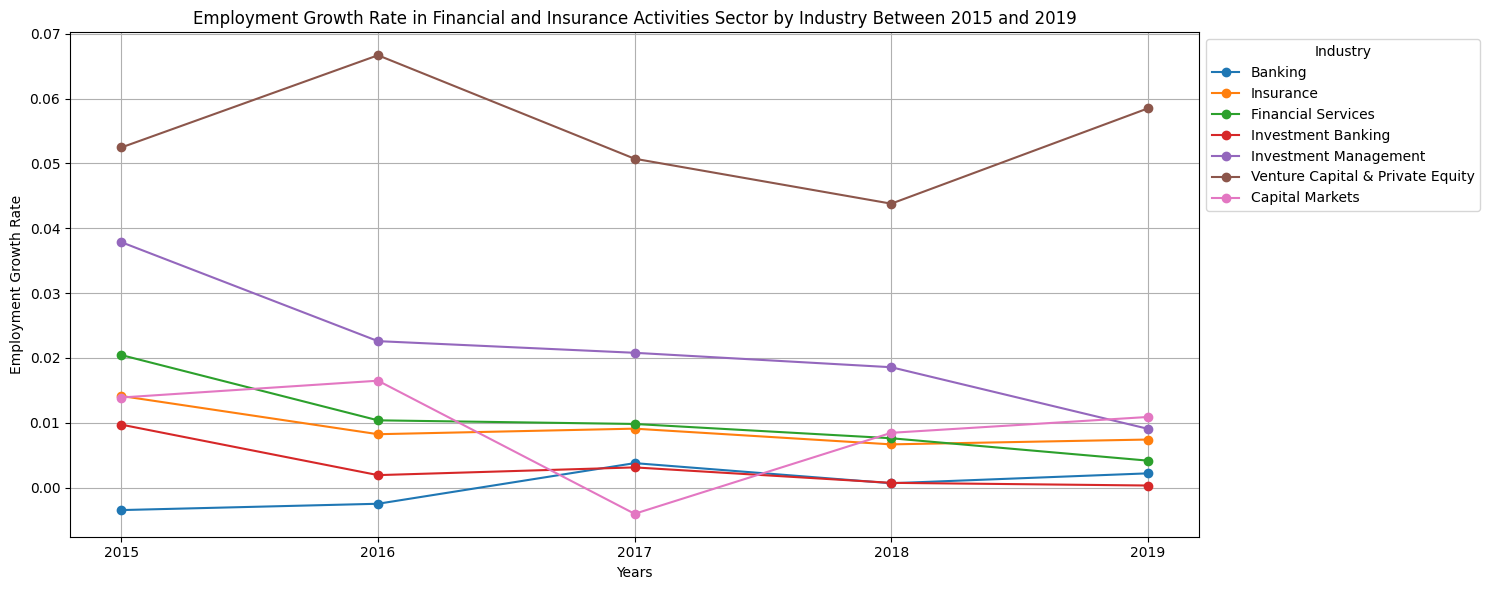

In [18]:
# Selecting relevant columns for plotting
years = ['2015', '2016', '2017', '2018', '2019']

# Plotting
plt.figure(figsize=(15, 6))
for index, row in financial_industry_rates.iterrows():
    plt.plot(years, row[years], marker='o', label=row['industry_name'])

# Setting labels, title and legend
plt.xlabel('Years')
plt.ylabel('Employment Growth Rate')
plt.title('Employment Growth Rate in Financial and Insurance Activities Sector by Industry Between 2015 and 2019')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', title = 'Industry')
plt.grid(True)
plt.tight_layout()

# Showing plot
plt.show()


**4. What are the skill ranks for the highest-growing industry(venture capital and private equity) within the financial and insurance activities industry section in the United States between 2015 and 2019?**


In [19]:
# Displaying summary information about the skill_need DataFrame
skill_needs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  3500 non-null   int64 
 1   isic_section_index    3500 non-null   object
 2   isic_section_name     3500 non-null   object
 3   industry_name         3500 non-null   object
 4   skill_group_category  3500 non-null   object
 5   skill_group_name      3500 non-null   object
 6   skill_group_rank      3500 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 191.5+ KB


In [20]:
# Displaying the first few rows of the skill_needs DataFrame
skill_needs.head()

,year,isic_section_index,isic_section_name,industry_name,skill_group_category,skill_group_name,skill_group_rank
0,2015,B,Mining and quarrying,Mining & Metals,Specialized Industry Skills,Mining,1
1,2015,B,Mining and quarrying,Mining & Metals,Soft Skills,Negotiation,2
2,2015,B,Mining and quarrying,Mining & Metals,Business Skills,Project Management,3
3,2015,B,Mining and quarrying,Mining & Metals,Business Skills,Business Management,4
4,2015,B,Mining and quarrying,Mining & Metals,Specialized Industry Skills,Earth Science,5


In [21]:
# Filtering rows with isic_section_name as 'Financial and insurance activities' and industry_name as Venture Capital & Private Equity
skill_rank = skill_needs[(skill_needs['isic_section_name'] == 'Financial and insurance activities') &
                         (skill_needs['industry_name'] == 'Venture Capital & Private Equity')]

# Dropping unnecessary columns
skill_rank = skill_rank.drop(columns = ['isic_section_index', 'skill_group_category'])

# Displaying the info of resulting skill_rank DataFrame
skill_rank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 370 to 3179
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   year               50 non-null     int64 
 1   isic_section_name  50 non-null     object
 2   industry_name      50 non-null     object
 3   skill_group_name   50 non-null     object
 4   skill_group_rank   50 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.3+ KB


In [22]:
# Displaying resulting skill_rank DataFrame
skill_rank.head()

,year,isic_section_name,industry_name,skill_group_name,skill_group_rank
370,2015,Financial and insurance activities,Venture Capital & Private Equity,Growth Strategies,1
371,2015,Financial and insurance activities,Venture Capital & Private Equity,Entrepreneurship,2
372,2015,Financial and insurance activities,Venture Capital & Private Equity,Capital Markets,3
373,2015,Financial and insurance activities,Venture Capital & Private Equity,Investment Banking,4
374,2015,Financial and insurance activities,Venture Capital & Private Equity,Financial Accounting,5


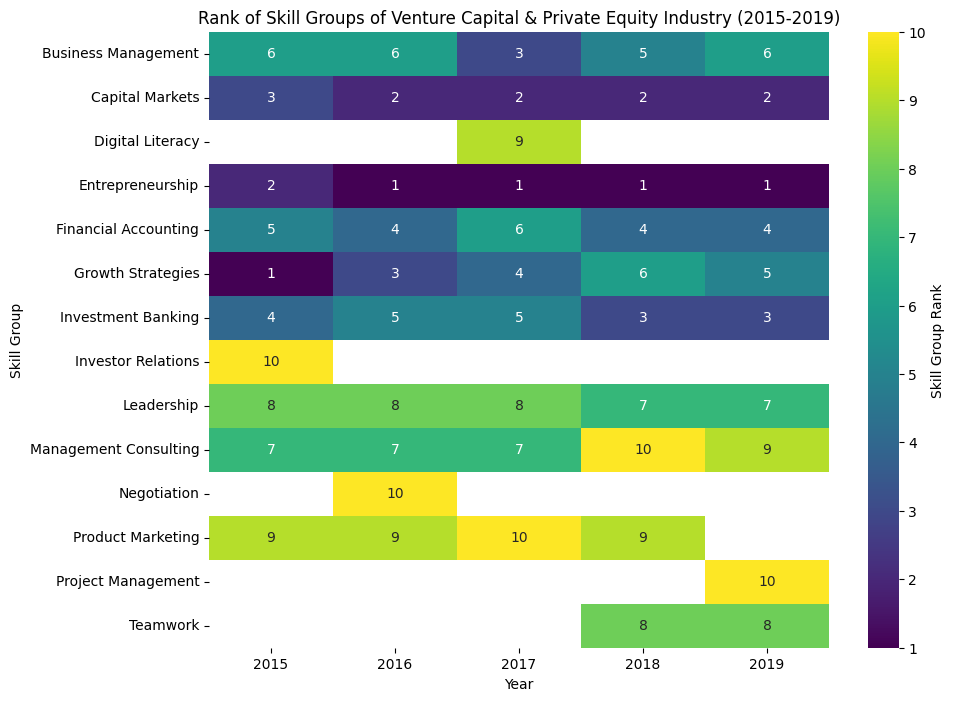

In [23]:
# Filtered data is grouped by 'year' and 'skill_group_name' and then pivot to prepare for plotting
pivot_data = skill_rank.pivot(index='skill_group_name', columns='year', values='skill_group_rank')

# Plotting a heatmap to visualize the rank of skill groups over the years
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_data, cmap='viridis', annot=True, fmt='g', cbar_kws={'label': 'Skill Group Rank'})

# Setting title, x-axis label, and y-axis label for the plot
plt.title('Rank of Skill Groups of Venture Capital & Private Equity Industry (2015-2019)')
plt.xlabel('Year')
plt.ylabel('Skill Group')

# Display the plot
plt.show()

**5. What are the skill trends for the highest-growing industry(venture capital and private equity) within the financial and insurance activities section in the United States between 2015 and 2019?**

In [24]:
# Displaying summary information about the skill_penetration DataFrame
skill_penetration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20780 entries, 0 to 20779
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          20780 non-null  int64  
 1   skill_group_category          20780 non-null  object 
 2   skill_group_name              20780 non-null  object 
 3   isic_section_index            20780 non-null  object 
 4   isic_section_name             20780 non-null  object 
 5   industry_name                 20780 non-null  object 
 6   skill_group_penetration_rate  20780 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 1.1+ MB


In [25]:
# Displaying the first few rows of the skill_penetration DataFrame
skill_penetration.head()

,year,skill_group_category,skill_group_name,isic_section_index,isic_section_name,industry_name,skill_group_penetration_rate
0,2015,Business Skills,Accounts Payable,M,Professional scientific and technical activities,Accounting,0.00719
1,2015,Business Skills,Accounts Payable,M,Professional scientific and technical activities,Law Practice,0.00244
2,2015,Business Skills,Accounts Payable,M,Professional scientific and technical activities,Executive Office,0.00222
3,2015,Business Skills,Accounts Payable,C,Manufacturing,Packaging & Containers,0.00132
4,2015,Business Skills,Accounts Payable,B,Mining and quarrying,Oil & Energy,0.00132


In [26]:
# Filtering rows with isic_section_name as 'Financial and insurance activities' and industry_name as Venture Capital & Private Equity
finance_skill_penetration = skill_penetration[(skill_penetration['isic_section_name'] == 'Financial and insurance activities') &
                            (skill_penetration['industry_name'] == 'Venture Capital & Private Equity')]

# Dropping unnecessary columns
finance_skill_penetration = finance_skill_penetration.drop(columns = ['isic_section_index', 'skill_group_category', 'isic_section_name', 'industry_name'])

# Displaying the info of resulting finance_skill_penetration DataFrame
finance_skill_penetration.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 7 to 20728
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          155 non-null    int64  
 1   skill_group_name              155 non-null    object 
 2   skill_group_penetration_rate  155 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.8+ KB


In [27]:
# Displaying the resulting finance_skill_penetration DataFrame
finance_skill_penetration.head()

,year,skill_group_name,skill_group_penetration_rate
7,2015,Accounts Payable,0.00102
46,2015,Administrative Assistance,0.00374
218,2015,Bookkeeping,0.00102
255,2015,Business Management,0.06701
327,2015,Capital Markets,0.07075


In [28]:
# List of specified skill_group_names
specified_skill_groups = [
    'Growth Strategies', 'Entrepreneurship', 'Capital Markets',
    'Investment Banking', 'Financial Accounting', 'Business Management',
    'Management Consulting', 'Leadership', 'Product Marketing',
    'Investor Relations', 'Negotiation', 'Digital Literacy',
    'Teamwork', 'Project Management']

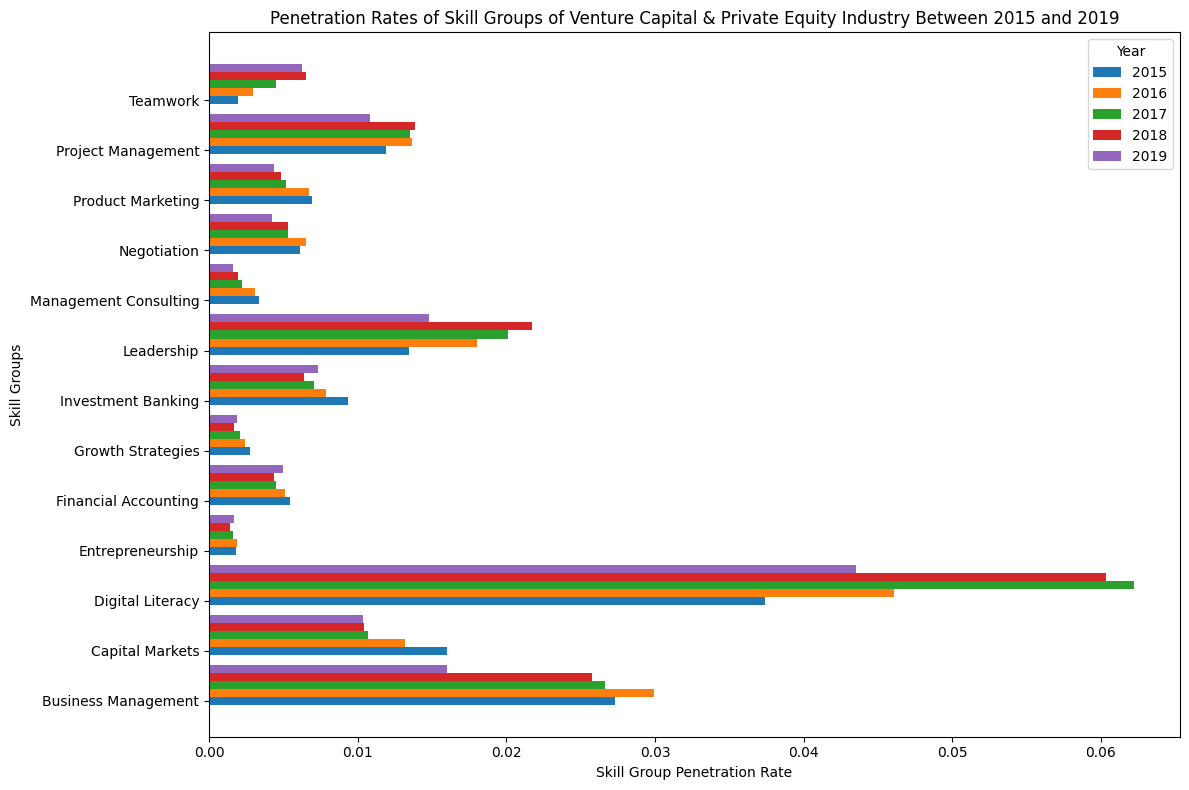

In [29]:
# Filtering data for the specified skill_group_names
specified_skill_penetration = skill_penetration[skill_penetration['skill_group_name'].isin(specified_skill_groups)]

# Pivoting the data to have skill group penetration rates over the years
pivot_data = specified_skill_penetration.pivot_table(index='skill_group_name', columns='year', values='skill_group_penetration_rate')

# Converting pivot_data to a numpy array for plotting
pivot_array = pivot_data.to_numpy()

# Getting years and skill groups
years = pivot_data.columns.astype(str)
skill_groups = pivot_data.index

# Calculating bar width for each year
num_years = len(years)
bar_width = 0.8 / num_years

# Plotting separate bar plots for each year for skill groups
plt.figure(figsize=(12, 8))

for i, year in enumerate(years):
    # Calculating position for bars
    bar_position = np.arange(len(skill_groups)) + i * bar_width

    # Plotting bars for each skill group
    plt.barh(bar_position, pivot_array[:, i], height=bar_width, label=year)

# Setting labels and title
plt.title('Penetration Rates of Skill Groups of Venture Capital & Private Equity Industry Between 2015 and 2019')
plt.xlabel('Skill Group Penetration Rate')
plt.ylabel('Skill Groups')

# Setting y-axis ticks and labels
plt.yticks(np.arange(len(skill_groups)), skill_groups)

# Showing legend for each year as a separate bar
plt.legend(title='Year')
plt.tight_layout()
plt.show()


**6. How has skill migration influenced the penetration rates of skill groups from venture capital & private equity industry between 2015 and 2019?**

In [30]:
# Filtering the us_skill_migration datafarme for specified skill groups
specified_us_skill_migration = us_skill_migration[us_skill_migration['skill_group_name'].isin(specified_skill_groups)]

# Dropping unnecessary columns
specified_us_skill_migration = specified_us_skill_migration.drop(columns = ['country_code', 'country_name', 'wb_income', 'wb_region', 'skill_group_id','skill_group_category'])

# Displaying the info of resulting specified_us_skill_migration DataFrame
specified_us_skill_migration.head()

,skill_group_name,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
16775,Digital Literacy,-31.67,-4.08,5.19,-0.22,3.73
16785,Leadership,-18.72,-0.31,7.31,1.61,4.35
16803,Investor Relations,3.81,0.62,13.06,1.30,6.12
16818,Growth Strategies,15.10,17.43,16.64,7.41,7.20
16826,Investment Banking,8.05,13.94,13.06,5.31,8.18


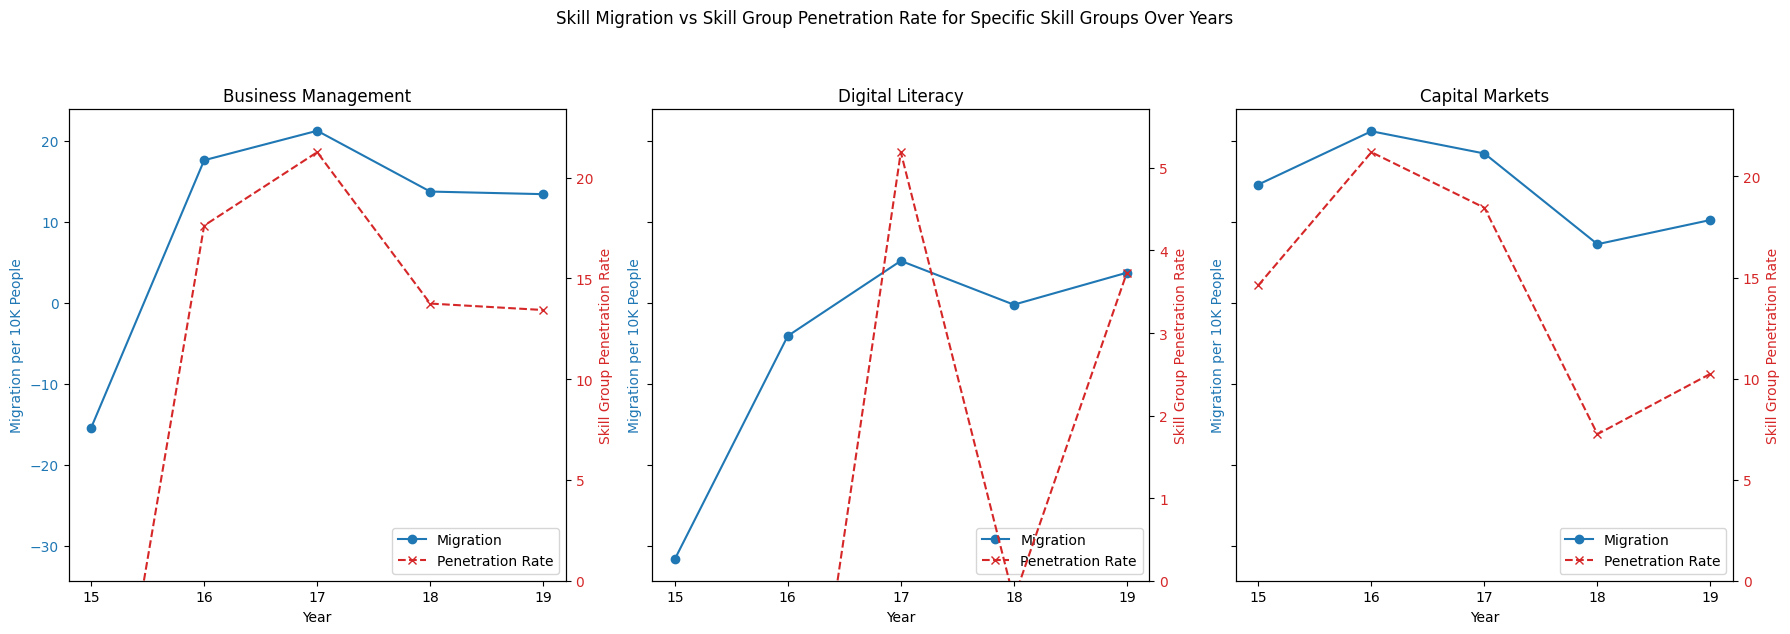

In [31]:
# Defining specific skill groups of interest
specified_skill_groups_2 = ['Business Management', 'Digital Literacy', 'Capital Markets']

# Merging and filtering data for specified skill groups
filtered_data = specified_us_skill_migration.merge(specified_skill_penetration, on='skill_group_name')
filtered_data = filtered_data[filtered_data['skill_group_name'].isin(specified_skill_groups_2)]

# Defining years and penetration rate column
years = ['net_per_10K_2015', 'net_per_10K_2016', 'net_per_10K_2017', 'net_per_10K_2018', 'net_per_10K_2019']
penetration_rate_column = 'skill_group_penetration_rate'

# Create subplots for each skill group
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Iterate through each specified skill group for plotting
for idx, skill_group in enumerate(specified_skill_groups_2):
    # Extracting data for the current skill group
    group_data = filtered_data[filtered_data['skill_group_name'] == skill_group]
    # Extracting migration rates for each year separately
    migration_rates = [group_data[year].values[0] for year in years]
    # Extracting penetration rates for each year separately
    penetration_rates = [group_data[year].values[0] for year in years]

    # Creating primary y-axis plot for migration rates
    ax1 = axs[idx]
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Migration per 10K People', color='tab:blue')
    ax1.set_title(skill_group)
    ax1.plot(years, migration_rates, label='Migration', marker='o', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Creating secondary y-axis plot for penetration rates
    ax2 = ax1.twinx()
    ax2.set_ylabel('Skill Group Penetration Rate', color='tab:red')
    ax2.plot(years, penetration_rates, label='Penetration Rate', linestyle='--', marker='x', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    ax2.set_ylim(0, max(penetration_rates) * 1.1)  # Setting y-axis limits for penetration rate

    # Combining legends from both axes and set the position
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc='lower right')

    # Setting x-axis ticks for years
    ax1.set_xticks(range(len(years)))
    ax1.set_xticklabels([str(year)[-2:] for year in years])

# Seting a common title for all subplots
plt.suptitle('Skill Migration vs Skill Group Penetration Rate for Specific Skill Groups Over Years', y=1.05)
# Adjusting subplot layout for better appearance
plt.tight_layout()
# Displaying the generated subplots
plt.show()


**7. What were the top industry migration gain and loss across various industries in the United States from 2015 to 2019?**


In [32]:
# Displaying summary information about the industry_migration DataFrame
industry_migration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5295 entries, 0 to 5294
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country_code        5295 non-null   object 
 1   country_name        5295 non-null   object 
 2   wb_income           5295 non-null   object 
 3   wb_region           5295 non-null   object 
 4   isic_section_index  5295 non-null   object 
 5   isic_section_name   5295 non-null   object 
 6   industry_id         5295 non-null   int64  
 7   industry_name       5295 non-null   object 
 8   net_per_10K_2015    5295 non-null   float64
 9   net_per_10K_2016    5295 non-null   float64
 10  net_per_10K_2017    5295 non-null   float64
 11  net_per_10K_2018    5295 non-null   float64
 12  net_per_10K_2019    5295 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 537.9+ KB


In [33]:
# Displaying the first few rows of the industry_migration DataFrame
industry_migration.head()

,country_code,country_name,wb_income,wb_region,isic_section_index,isic_section_name,industry_id,industry_name,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
0,ae,United Arab Emirates,High income,Middle East & North Africa,C,Manufacturing,1,Defense & Space,378.74,127.94,8.20,68.51,49.55
1,ae,United Arab Emirates,High income,Middle East & North Africa,J,Information and communication,3,Computer Hardware,100.97,358.14,112.98,149.57,182.22
2,ae,United Arab Emirates,High income,Middle East & North Africa,J,Information and communication,4,Computer Software,1079.36,848.15,596.48,409.18,407.41
3,ae,United Arab Emirates,High income,Middle East & North Africa,J,Information and communication,5,Computer Networking,401.46,447.39,163.99,236.69,188.07
4,ae,United Arab Emirates,High income,Middle East & North Africa,J,Information and communication,6,Internet,1840.33,1368.42,877.71,852.39,519.40


<ipython-input-34-a45145b09ddd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_2['net_migration_change'] = filtered_data_2[years].mean(axis=1)


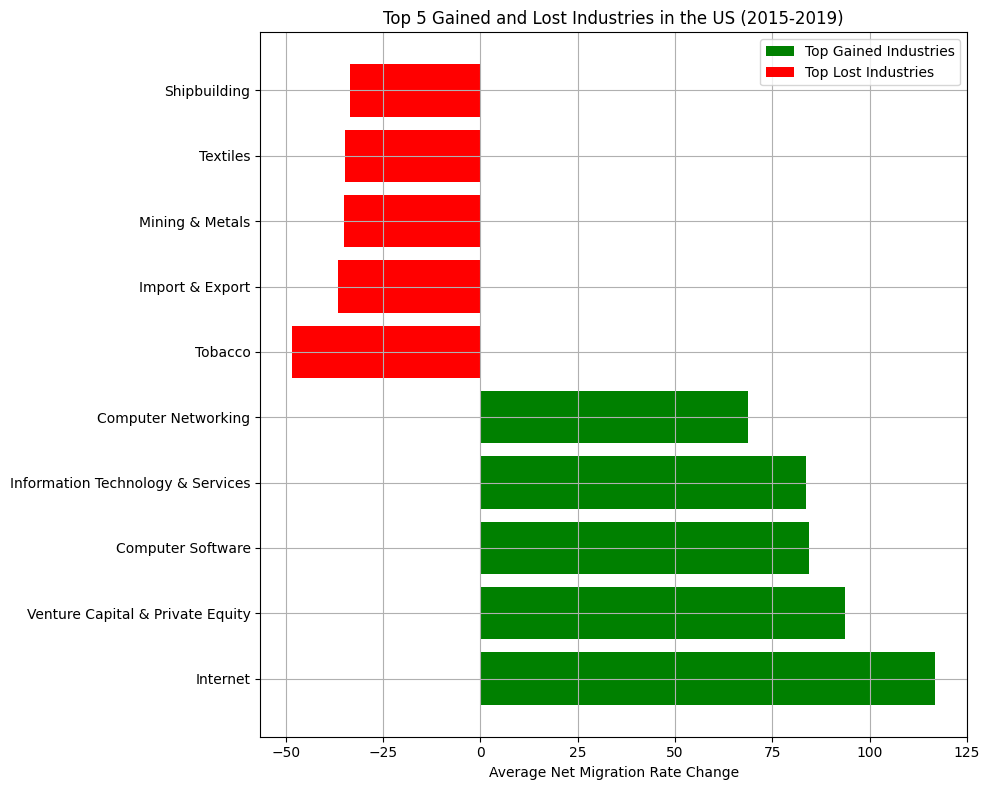

In [34]:
# Filter data for the US and the years 2015 to 2019
filtered_data_2 = industry_migration[industry_migration['country_name'] == 'United States']

# Selecting net migration columns for the years 2015 to 2019
years = [f"net_per_10K_{year}" for year in range(2015, 2020)]

# Calculating average net migration change between 2015 and 2019 for each industry
filtered_data_2['net_migration_change'] = filtered_data_2[years].mean(axis=1)
net_migration_change = filtered_data_2.groupby('industry_name')['net_migration_change'].mean().reset_index()

# Separate gained and lost industries and select top 5
top_gained = net_migration_change.nlargest(5, 'net_migration_change')
top_lost = net_migration_change.nsmallest(5, 'net_migration_change')

# Plotting the bar chart for top 5 gained and lost industries
plt.figure(figsize=(10, 8))

# Plotting gained industries (upward bars)
plt.barh(top_gained['industry_name'], top_gained['net_migration_change'], color='green', label='Top Gained Industries')

# Plotting lost industries (downward bars)
plt.barh(top_lost['industry_name'], top_lost['net_migration_change'], color='red', label='Top Lost Industries')

# Setting labels, title and legend
plt.xlabel('Average Net Migration Rate Change')
plt.title('Top 5 Gained and Lost Industries in the US (2015-2019)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Displaying the plot
plt.show()


**8. How does this industry migration effect the industry growth of the computer software industry in US?**

In [35]:
# Displaying the first few rows of the us_employment_growth_rate DataFrame
us_employment_growth_rate.head()

,country_code,isic_section_name,industry_name,2015,2016,2017,2018,2019
6886,us,Mining and quarrying,Mining & Metals,-0.015838,-0.025637,0.005463,0.004842,-0.001883
6887,us,Mining and quarrying,Oil & Energy,-0.016801,-0.020809,0.005749,0.007972,0.002914
6888,us,Manufacturing,Pharmaceuticals,0.015979,0.015540,0.007148,0.004102,0.011908
6889,us,Manufacturing,Food Production,0.004666,0.007200,0.003567,-0.000632,-0.000076
6890,us,Manufacturing,Aviation & Aerospace,0.010161,0.010762,0.008679,0.019979,0.009865


In [36]:
# Filtering the DataFrame for rows where industry_name is 'Computer Software'
computer_software_data = us_employment_growth_rate[us_employment_growth_rate['industry_name'] == 'Computer Software']

# Displating the resulting computer_software_data DataFrame
computer_software_data.head()

,country_code,isic_section_name,industry_name,2015,2016,2017,2018,2019
6906,us,Information and communication,Computer Software,0.051423,0.048808,0.039281,0.033274,0.029799


In [37]:
migration_computer = filtered_data_2[filtered_data_2['industry_name'] == 'Computer Software']

# Displating the resulting migration_computer DataFrame
migration_computer.head()

,country_code,country_name,wb_income,wb_region,isic_section_index,isic_section_name,industry_id,industry_name,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019,net_migration_change
4948,us,United States,High income,North America,J,Information and communication,4,Computer Software,98.13,108.15,109.91,59.4,46.42,84.402


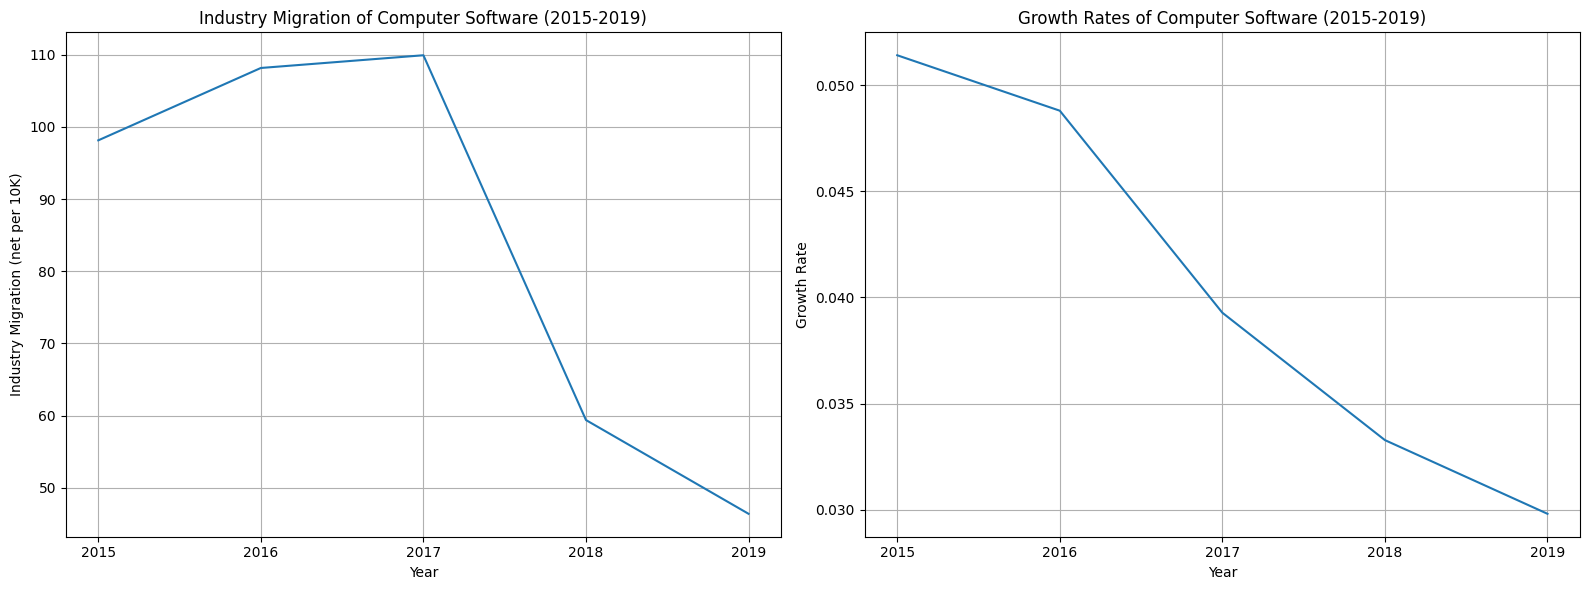

In [38]:
# Selecting the necessary data for plotting
years = ['2015', '2016', '2017', '2018', '2019']

# Transposing the DataFrames for correct alignment of columns with years
migration_data = migration_computer[['net_per_10K_2015', 'net_per_10K_2016', 'net_per_10K_2017', 'net_per_10K_2018', 'net_per_10K_2019']].transpose()
growth_rates = computer_software_data[['2015', '2016', '2017', '2018', '2019']].transpose()

# Plotting side-by-side line graphs
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Plotting industry migration in the first subplot (axes[0])
for col in migration_data.columns:
    axes[0].plot(years, migration_data[col], label=col)

# Setting labels and title for the first subplot
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Industry Migration (net per 10K)')
axes[0].set_title('Industry Migration of Computer Software (2015-2019)')
axes[0].grid(True)

# Plotting growth rates in the second subplot (axes[1])
for col in growth_rates.columns:
    axes[1].plot(years, growth_rates[col], label=col)

# Setting labels and title for the second subplot
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Growth Rate')
axes[1].set_title('Growth Rates of Computer Software (2015-2019)')
axes[1].grid(True)

# Adjusting layout and displaying the plot
plt.tight_layout()
plt.show()
